In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Celestial Mechanics
## Lecture 19

*Material taken from Chapter 4: The Solar System of Giordano*

Consider a hypothetical solar system.  There is one planet (call it *Earth*) in orbit around the Sun and the only force in the problem is gravity.  Newton's Law of graviation gives us the magnitude of the force as

$$ F_G = \frac{G M_S M_E} {r^2},$$ 
where $M_S$ and $M_E$ are the masses of the Sun and Earth, $r$ is the distance between them, and $G$ is the gravitational constant.  

Assume that the Sun's mass is sufficiently large that its motion can be neglected.  Our goal is to calculate the position of Earth as a function of time.

From Newton's second law of motion we have

\begin{align}
\frac{d^2x}{dt^2} &= \frac{F_{G, x}}{M_E} \\
\frac{d^2y}{dt^2} &= \frac{F_{G, y}}{M_E} 
\end{align}

where $F_{G,x}$ and $F_{G,y}$ are the $x$ and $y$ components of gravitational force. 

Each component of the gravity force can be written as

$$F_{G,x} = - \frac{G M_S M_E}{r^2} \cos\theta = - \frac{G M_S M_E x}{r^3}, $$

We need to rewrite each of these second order differential equations as two
first-order differential equations.

\begin{align}
\frac{d v_x}{dt} &= - \frac{G M_S x}{r^3} \\
\frac{d x}{dt} &= v_x \\
\frac{d v_y}{dt} &= - \frac{G M_S y}{r^3} \\
\frac{d y}{dt} &= v_y \\
\,
\end{align}

We can then solve these equations numerically.

In [2]:
π = np.pi

def orbit(tmax = 1.0, dt = 0.002, v0 = 2*π, x0 = 1):
    """
    Calculate the orbit of planet
    """

    # number of timesteps
    N = round(tmax/dt)

    # allocate arrays
    x = np.zeros(N)
    y = np.zeros(N)
    vx = np.zeros(N)
    vy = np.zeros(N)
    t = np.zeros(N)
    
    # initialise position of planet in AU
    x[0] = x0
    y[0] = 0

    # initialise velocity of planet in AU/yr
    vx[0] = 0
    vy[0] = v0

    # loop over the timesteps
    for i in range(N-1):
        t[i+1] = t[i] + dt
        
        r = np.sqrt(x[i]**2+y[i]**2)
        
        # Compute new velocities in the x and y directions
        vx[i+1] = vx[i] - (4*π**2*x[i]*dt)/(r**3)
        vy[i+1] = vy[i] - (4*π**2*y[i]*dt)/(r**3)
        
        # Euler-Cromer Step - update positions using newly calculated velocities
        x[i+1] = x[i] + vx[i+1]*dt
        y[i+1] = y[i] + vy[i+1]*dt
        # if Euler's method, then update x using the *old* value for vx
        #x[i+1] = x[i] + vx[i]*dt
        #y[i+1] = y[i] + vy[i]*dt
        
    return x, y, vx, vy, t

In [3]:
x, y, vx, vy, t = orbit(tmax=1.0)

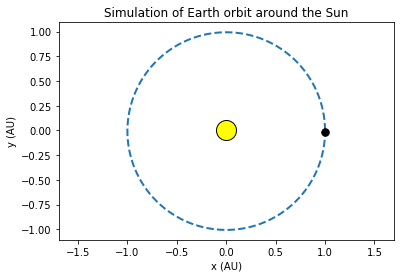

In [4]:
def plot_orbit(x, y):

    plt.plot(x, y, '--', linewidth=2)

    # Plot the Sun at the origin
    plt.plot(0, 0, '.',color="yellow", markersize=40, markeredgecolor='black')
    # Plot the Earth at the final position
    plt.plot(x[-1], y[-1], '.', color= 'k', markersize=15)

    plt.xlabel('x (AU)')
    plt.ylabel('y (AU)')
    plt.axis('equal')
    
    
plot_orbit(x, y)
plt.title('Simulation of Earth orbit around the Sun')
plt.show()

Recall that the Euler algoritm is not a good choice for oscillatory problems such as planetary motion.  Energy with the Euler method is not conserved and we would find the energy of the planet would grow with time.  The Euler-Cromer method, which conserves energy, avoids this difficulty.

#### Exercise
> Comment out the Euler-Cromer step and uncomment the Euler step in the above routine and rerun with `tmax = 2.0`
>
> Notice that the solution is unstable.  The solution would also be unstable if `dt` was too large.
>

### Choice of units

Distance: Astronomical Units (AU)

Time: Year (yr)

Mass: ?

### Elliptical orbits

The choice of initial velocity was critical to acheive a circular orbit. 

Notice that we chose

$$ v_0 = 2\pi $$

which may seem like a slightly strange looking speed. 

But, if you recall the units for this speed is in units of AU/yr perhaps, hopefully you'll see why this has to be the correct speed.


If we change the initial speed to being different from $2\pi$, we get different shaped orbits.

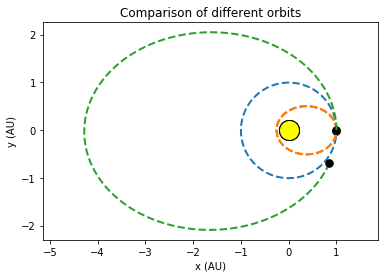

In [5]:
x, y, vx, vy, t = orbit(v0 = 2*π, tmax = 1.0)
plot_orbit(x, y)

x, y, vx, vy, t = orbit(v0 = 4, tmax = 1.0)
plot_orbit(x, y)

x, y, vx, vy, t = orbit(v0 = 8, tmax = 4.2)
plot_orbit(x, y)
plt.title('Comparison of different orbits')
plt.show()

#### Exercise
> Adjust `tmax` so that the faster planet completes its orbit.

### Making animations

Sometimes animations are better at vizualization what is happening in a system.  Orbital mechnics is one of those cases.  Wouldn't it be better to to *see* the planet orbiting the sun?

In [6]:
from matplotlib import animation, rc
from IPython.display import HTML, display
rc('animation', html='html5')

#### Example
Example taken from http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

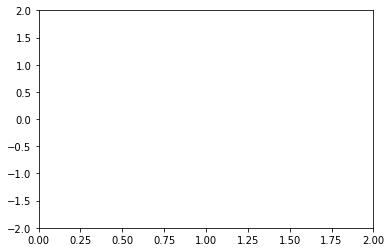

In [7]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

In [8]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

In [9]:
# animation function. This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

In [10]:
# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

Installation of ffmpeg..

     conda install -y ffmpeg

In [12]:
anim

#### Animation of a an orbiting planet

In [13]:
def animate_orbit(x, y, t):
    
    # First set up the figure, the axis, and the plot element we want to animate
    fig, ax = plt.subplots(figsize=(8,4))
    
    # Plot the orbit
    orbit, = ax.plot([], [], '--', linewidth=2)
    # Plot the planet at the current position
    position, = ax.plot([], [], '.', color= 'k', markersize=15)

    label = ax.text(-3, 1, '', fontsize=14)
    
    plt.xlabel('x (AU)')
    plt.ylabel('y (AU)')
    
    ax.set_xlim(( -4, 2))
    ax.set_ylim((-2, 2))
    
    dt = t[1] - t[0]
    animate_dt = 0.02
    skip_frames = int(animate_dt // dt)
    nframes = int(len(t) // skip_frames)

    # initialization function: plot the background of each frame
    def init():
         # Plot the Sun at the origin
        plt.plot(0, 0, '.',color="yellow", markersize=40, markeredgecolor='black')
        orbit.set_data([], [])
        position.set_data([], [])
        label.set_text('')
        
        return (orbit, position, label)
    
    # animation function. This is called sequentially
    def animate(i):
        i = i*skip_frames
        orbit.set_data(x[:i], y[:i])
        position.set_data(x[i], y[i])
        label.set_text('t = {:.2f} yr'.format(t[i]))
        
        return (orbit, position, label)

    
    # call the animator. blit=True means only re-draw the parts that have changed.
    anim = animation.FuncAnimation(fig, animate, init_func=init,
                                   frames=nframes, interval=20*skip_frames, blit=True)
    
    return anim

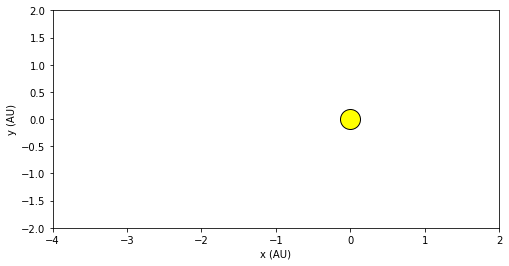

In [14]:
x, y, vx, vy, t = orbit(v0 = 4, tmax = 1.0)
anim = animate_orbit(x, y, t)

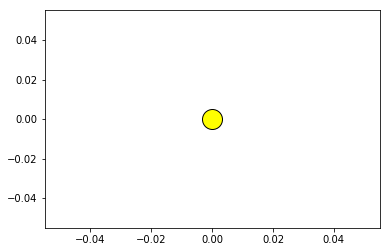

In [15]:
anim

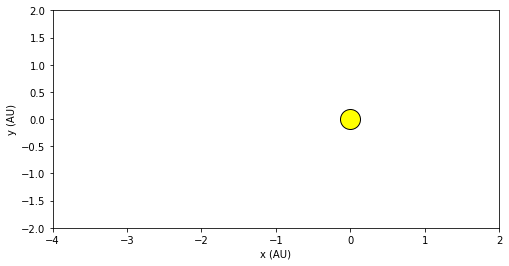

In [17]:
x, y, vx, vy, t = orbit(v0 = 7.5, tmax = 4.0)
anim = animate_orbit(x, y, t)

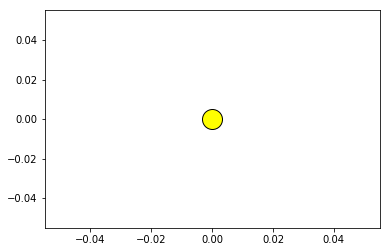

In [18]:
anim

## Kepler's Laws

1. All planets move in elliptical orbits, with the Sun at one focus.
2. The line joining a planent to the Sun sweeps out equal areas in equal times.
3. If $T$ is the period and $a$ is the semimajor axis of the orbit, then $T^2/a^3$ is a constant.

### Planetary data

planet
- Mass, `m` in kg
- Semimajor axis, `a` in AU
- Eccentricity, `e` (non-dimensional)

In [98]:
data = { 'Mercury' : {'m':2.4e23, 'a':0.39,  'e':0.206},
         'Venus'   : {'m':4.9e24, 'a':0.72,  'e':0.007},   
         'Earth'   : {'m':6.0e24, 'a':1.00,  'e':0.017},  
         'Mars'    : {'m':6.6e23, 'a':1.52,  'e':0.093},
         'Jupiter' : {'m':1.9e27, 'a':5.20,  'e':0.048},
         'Saturn'  : {'m':5.7e26, 'a':9.54,  'e':0.056},
         'Uranus'  : {'m':8.8e25, 'a':19.19, 'e':0.046},
         'Neptune' : {'m':1.03e26,'a':30.06, 'e':0.010},
         'Pluto'   : {'m':6.0e24, 'a':39.53, 'e':0.248},
        }

The data above is presented as a Python dictionary.

In [99]:
data['Earth']

{'a': 1.0, 'e': 0.017, 'm': 6e+24}

In [100]:
planet = data['Earth']
planet['m']

6e+24

In [101]:
data['Jupiter']['a']

5.2

### Period

We need to determine the period, $T$. This is time before the $x$ and $y$ positions repeat.

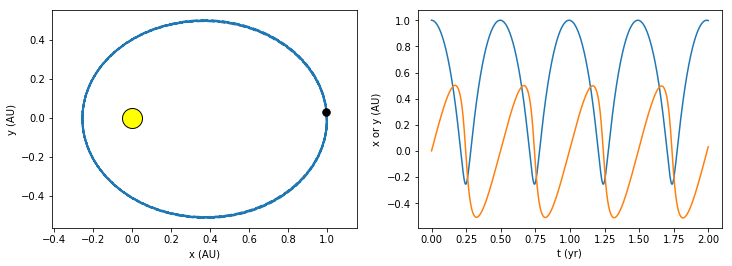

In [111]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x, y, vx, vy, t = orbit(v0 = 4, tmax = 2.0)

plt.sca(axes[0])
plot_orbit(x, y)

plt.sca(axes[1])
plt.plot(t, x)
plt.plot(t, y)
plt.xlabel('t (yr)')
plt.ylabel('x or y (AU)')
plt.show()

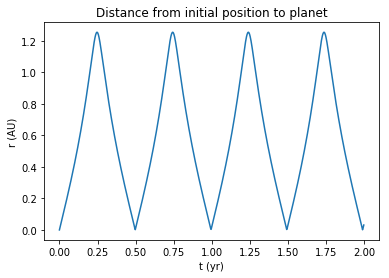

In [112]:
r = np.sqrt((x - x[0])**2 + (y - y[0])**2)
plt.plot(t, r)
plt.xlabel('t (yr)')
plt.ylabel('r (AU)')
plt.title('Distance from initial position to planet')
plt.show()

In [113]:
def calc_period(x, y, t, tolerance=0.01):

    # calculate distance from planet to sun
    r = np.sqrt((x - x[0])**2 + (y - y[0])**2)
    i = 0
    # get beyond starting position
    while i < len(r)-1:
        if r[i] > tolerance:
            break
        i += 1
            
    # determine when planet returns to starting position
    while i < len(r)-1:
        if r[i] < tolerance:
            break
        i += 1
        
    # the period is when the orbit returns to its starting position
    T = t[i]
    # check to make sure we have actually made a complete orbit
    if r[i] > tolerance:
        print('Warning! Complete orbit not completed')

    return T

In [114]:
x, y, vx, vy, t = orbit(v0 = 2*π, tmax = 2.0)
T = calc_period(x, y, t)
print(T)

1.0


In [115]:
x, y, vx, vy, t = orbit(v0 = 4, tmax = 2.0)
T = calc_period(x, y, t)
print(T)

0.496


In [116]:
x, y, vx, vy, t = orbit(v0 = 8, tmax = 2.0)
T = calc_period(x, y, t)
print(T)

Warning! Complete orbit not completed
1.998


In [117]:
x, y, vx, vy, t = orbit(v0 = 8, tmax = 6.0)
T = calc_period(x, y, t)
print(T)

4.29


### Eccentricity

*Show geometry on board*


In [118]:
def calc_eccentricity(x, y, t):

    # major semiaxis
    a = (max(x)-min(x))/2
    # minor semiaxis
    b = (max(y)-min(y))/2
    
    if b > a:
        a, b = b, a

    # compute eccentricity
    e = np.sqrt(1 - b**2/a**2)
    
    return e

In [119]:
x, y, vx, vy, t = orbit(v0 = 2*π, tmax = 2.0)
e = calc_eccentricity(x, y, t)
print(e)

0.00823106669062


In [120]:
x, y, vx, vy, t = orbit(v0 = 4, tmax = 2.0)
e = calc_eccentricity(x, y, t)
print(e)

0.588331486911


In [121]:
x, y, vx, vy, t = orbit(v0 = 8, tmax = 6.0)
e = calc_eccentricity(x, y, t)
print(e)

0.621124249856


## Trial and Error
Determine the period of Jupiter around the Sun.  We need to determine **`v0`**

e = 0.047, T = 12.752
e =  0.048


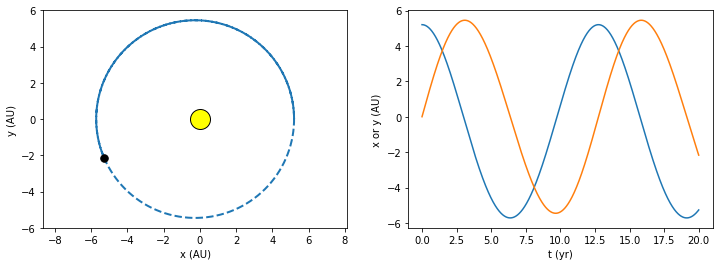

In [134]:
planet = data['Jupiter']

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

x, y, vx, vy, t = orbit(v0=2.82, tmax = 20, x0 = planet['a'])
T = calc_period(x, y, t)
e = calc_eccentricity(x, y, t)
print ('e = {:.3f}, T = {:.3f}'.format(e, T))

plt.sca(axes[0])
plot_orbit(x, y)

plt.sca(axes[1])
plt.plot(t, x)
plt.plot(t, y)
plt.xlabel('t (yr)')
plt.ylabel('x or y (AU)')

print('e = ', planet['e'])

We need to adjust `v0` so that the eccentricity matches that of Jupiter.

#### Exercise:
> Adjust `v0` in the above code and rerun.  Try to get `e` to match 0.048.

Wouldn't it be better if we had a more *interactive* way of dealing with this?

In [135]:
from ipywidgets import interact

In [136]:
@interact(planetname=list(data.keys()),
          v0=(1, 5, 0.01))
def investigate_orbit(planetname='Jupiter', v0=1):
    planet = data[planetname]
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    x, y, vx, vy, t = orbit(v0=v0, tmax = 15, x0 = planet['a'])
    T = calc_period(x, y, t)
    e = calc_eccentricity(x, y, t)

    plt.sca(axes[0])
    plot_orbit(x, y)

    plt.sca(axes[1])
    plt.plot(t, x)
    plt.plot(t, y)
    plt.xlabel('t (yr)')
    plt.ylabel('x or y (AU)')
    
    plt.suptitle('{}: v0 = {:.2f}, e = {:.3f}, T = {:.3f}'.format(planetname, v0, e, T), fontsize=14)

interactive(children=(Dropdown(description='planetname', index=4, options=('Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto'), value='Jupiter'), FloatSlider(value=1.0, description='v0', max=5.0, min=1.0, step=0.01), Output()), _dom_classes=('widget-interact',))

### Optimization problem

In [ ]:
def eccentricity_error(v0, planetname='Jupiter'):
    planet = data[planetname]
    
    x, y, vx, vy, t = orbit(v0=v0,dt=0.001, tmax = 14, x0 = planet['a'])
    e = calc_eccentricity(x, y, t)
    
    return abs(e-planet['e'])

In [145]:
eccentricity_error(2.688)

0.00029395911434870747

In [143]:
from scipy import optimize

In [144]:
optimize.brent(eccentricity_error, args = ('Jupiter',))

2.6884162092357462

In [146]:
optimize.brent(eccentricity_error, args = ('Earth',))

1.0011009255709062

### Demonstrate Kepler's third law by estimating period of each planet.

Need to determine the velocity v such that we get the correct eccentricity and then
$T$, period....


In [147]:
for planetname in ['Earth', 'Mars', 'Jupiter']:
    planet = data[planetname]
    print(planetname, planet)
    
    v0 = optimize.brent(eccentricity_error, brack=(2,6), args = (planetname,))
    
    x, y, vx, vy, t = orbit(v0=v0, tmax = 20, x0 = planet['a'])
    
    e = calc_eccentricity(x, y, t)
    T = calc_period(x, y, t)
    
    print('==>', e, v0, T)
    print()

Earth {'m': 6e+24, 'a': 1.0, 'e': 0.017}
==> 0.0150309179528 6.33836025681 1.026

Mars {'m': 6.6e+23, 'a': 1.52, 'e': 0.093}
==> 0.0925039997167 4.8533070551 1.638

Jupiter {'m': 1.9e+27, 'a': 5.2, 'e': 0.048}
==> 0.0479967442824 2.8207137533 12.764

